<a href="https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/notebooks/decision_trees_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Introduction to Decision Trees

- First section [A Guide to Decision Trees for Machine Learning and Data Science](https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956)) by George Seif in [towardsdatascience.com](https://towardsdatascience.com)
- Additional notes incorporated from [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/tree.html) by Christoph Molnar.
- Last section [Scikit-Learn Decision Trees Explained](https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d) by Frank Ceballos in [towardsdatascience.com](https://towardsdatascience.com)
- Additional resource [Understanding Decision Trees for Classification (Python)](https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952) by Michael Galarnyk.


Updated by [John Fogarty](https://github.com/jfogarty) for Python 3.6 and [Base2 MLI](https://github.com/base2solutions/mli).

Decision Trees are a class of very powerful Machine Learning model capable of achieving high accuracy in many tasks while being highly interpretable. What makes decision trees special in the realm of ML models is really their clarity of information representation. The “knowledge” learned by a decision tree through training is directly formulated into a hierarchical structure. This structure holds and displays the knowledge in such a way that it can easily be understood, even by non-experts.

## Decision Trees in Real-Life

You’ve probably used a decision tree before to make a decision in your own life. Take for example the decision about what activity you should do this weekend. It might depend on whether or not you feel like going out with your friends or spending the weekend alone; in both cases, your decision also depends on the weather. If it’s sunny and your friends are available, you may want to play soccer. If it ends up raining you’ll go to a movie. And if your friends don’t show up at all, well then you like playing video games no matter what the weather is like!

<figure><br>
  <center><img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/dt_1.png?raw=1" /></center>
</figure>

This is a clear example of a real-life decision tree. We’ve built a tree to model a set of **sequential, hierarchical decisions** that ultimately lead to some final result. Notice that we’ve also chosen our decisions to be quite “high-level” in order to keep the tree small. For example, what if we set up many possible options for the weather such as 25 degrees sunny, 25 degrees raining, 26 degrees sunny, 26 degrees raining, 27 degrees sunny…. etc, our tree would be huge! The **exact** temperature really isn’t too relevant, we just want to know whether it’s OK to be outside or not.

The concept is the same for decision trees in Machine Learning. We want to build a tree with a set of hierarchical decisions which eventually give us a final result, i.e our classification or regression prediction. The decisions will be selected such that the tree is as small as possible while aiming for high classification / regression accuracy.

### Induction

From a high level, decision tree induction goes through 4 main steps to build the tree:

1. Begin with your training dataset, which should have some feature variables and classification or regression output.

2. Determine the “best feature” in the dataset to split the data on; more on how we define “best feature” later

3. Split the data into subsets that contain the possible values for this best feature. This splitting basically defines a node on the tree i.e each node is a splitting point based on a certain feature from our data.

4. Recursively generate new tree nodes by using the subset of data created from step 3. We keep splitting until we reach a point where we have optimised, by some measure, maximum accuracy while minimising the number of splits / nodes.

Step 1 is easy, just grab your dataset!

For step 2, the selection of which feature to use and the specific split is commonly chosen using a greedy algorithm to minimise a cost function. If we think about it for a second, performing a split when building a decision tree is equivalent to dividing up the feature space. We will iteratively try out different split points and then at the end select the one that has the lowest cost. Of course we can do a couple of smart things like only splitting within the range of values in our dataset. This will keep us from wasting computations on testing out split points that are trivially poor.

For a [**regression tree**](http://saedsayad.com/decision_tree_reg.htm), we want to build a decision tree that reports an analog response - prices, temperature, etc.  We can use a simple squared error as our cost function:

$$
E = \sum (Y - \hat{Y})^2
$$

Where $Y$ is our ground truth and $\hat{Y}$ is our predicted value; we sum over all the samples in our dataset to get the total error. 

A [**classification tree**](https://www.solver.com/classification-tree) assigns nodes to discrete classes; for this we use the [Gini Index Function](https://en.wikipedia.org/wiki/Gini_coefficient):

$$
E = \sum (p_k * (1 - p_k))
$$

Where $p_k$ are the proportion of training instances of class $k$ in a particular prediction node. A node should *ideally* have an error value of zero, which means that each split outputs a single class 100% of the time. This is exactly what we want because then we know, once we get to that particular decision node, what exactly our output will be whether we are on one side of the decision boundary or the other.

Sometimes instead of the Gini coefficient, a very similar measurement called entropy is used:

$$
E = - \sum  p_k * log_2(p_k)
$$

This concept of having a single class per-split across our dataset is known as *information gain*. Check out the example below.

<figure><br>
  <center><img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/dt_2.png?raw=1" /></center>
</figure>


If we were to choose a split where each output has a mix of classes depending on the input data, then we really haven’t *gained* any information at all; we don’t know any better whether or not a particular node i.e feature has any influence in classifying our data! On the other hand, if our split has a high percentage of each class for each output, then we have *gained* the information that splitting in that particular way on that particular feature variable gives us a particular output!

Now we could of course keep splitting and splitting and splitting until our tree has thousands of branches….. but that’s not really such a good idea! Our decision tree would be huge, slow, and overfitted to our training dataset. Thus, we will set some predefined stopping criterion to halt the construction of the tree.

The most common stopping method is to use a minimum count on the number of training examples assigned to each leaf node. If the count is less than some minimum value then the split is not accepted and the node is taken as a final leaf node. If all of our leaf nodes become final, the training stops. A smaller minimum count will give you finer splits and potentially more information, but is also prone to overfitting on your training data. Too large of a min count and you might stop too early. As such, the min value is usually set based on the dataset, depending on how many examples are expected to be in each class.

### Pruning

Because of the nature of training decision trees they can be prone to major overfitting. Setting the correct value for minimum number of instances per node can be challenging. Most of the time, we might just go with a safe bet and make that minimum quite small, resulting in there being many splits and a very large, complex tree. The key is that many of these splits will end up being redundant and unnecessary to increasing the accuracy of our model.

Tree pruning is a technique that leverages this splitting redundancy to remove i.e *prune* the unnecessary splits in our tree. From a high-level, pruning compresses part of the tree from strict and rigid decision boundaries into ones that are more smooth and generalise better, effectively reducing the tree complexity. The complexity of a decision tree is defined as the number of splits in the tree.

A simple yet highly effective pruning method is to go through each node in the tree and evaluate the effect of removing it on the cost function. If it doesn’t change much, then prune away!

## Advantages
The tree structure is ideal for **capturing interactions** between features in the data.

The data ends up in **distinct groups** that are often easier to understand than points on a multi-dimensional hyperplane as in linear regression. The interpretation is arguably pretty simple.

The tree structure also has a **natural visualization**, with its nodes and edges.

Trees create good explanations. The tree structure automatically invites you to think about predicted values for individual instances as counterfactuals: “If a feature had been greater / smaller than the split point, the prediction would have been $y1$ instead of $y2$. The tree explanations are contrastive, since you can always compare the prediction of an instance with relevant ”what if“-scenarios (as defined by the tree) that are simply the other leaf nodes of the tree. If the tree is short, like one to three splits deep, the resulting explanations are selective. A tree with a depth of three requires a maximum of three features and split points to create the explanation for the prediction of an individual instance. The truthfulness of the prediction depends on the predictive performance of the tree. The explanations for short trees are very simple and general, because for each split the instance falls into either one or the other leaf, and binary decisions are easy to understand.

There is no need to transform features. In linear models, it is sometimes necessary to take the logarithm of a feature. A decision tree works equally well with any monotonic transformation of a feature.

## Disadvantages

**Trees fail to deal with linear relationships**. Any linear relationship between an input feature and the outcome has to be approximated by splits, creating a step function. This is not efficient.

This goes hand in hand with **lack of smoothness**. Slight changes in the input feature can have a big impact on the predicted outcome, which is usually not desirable. Imagine a tree that predicts the value of a house and the tree uses the size of the house as one of the split feature. The split occurs at 100.5 square meters. Imagine user of a house price estimator using your decision tree model: They measure their house, come to the conclusion that the house has 99 square meters, enter it into the price calculator and get a prediction of 200 000 Euro. The users notice that they have forgotten to measure a small storage room with 2 square meters. The storage room has a sloping wall, so they are not sure whether they can count all of the area or only half of it. So they decide to try both 100.0 and 101.0 square meters. The results: The price calculator outputs 200 000 Euro and 205 000 Euro, which is rather unintuitive, because there has been no change from 99 square meters to 100.

Trees are also quite **unstable**. A few changes in the training dataset can create a completely different tree. This is because each split depends on the parent split. And if a different feature is selected as the first split feature, the entire tree structure changes. It does not create confidence in the model if the structure changes so easily.

Decision trees are very interpretable – as long as they are short. **The number of terminal nodes increases quickly with depth**. The more terminal nodes and the deeper the tree, the more difficult it becomes to understand the decision rules of a tree. A depth of 1 means 2 terminal nodes. Depth of 2 means max. 4 nodes. Depth of 3 means max. 8 nodes. The maximum number of terminal nodes in a tree is 2 to the power of the depth.

# Python code

**Usage NOTE!** Use `Shift+Enter` to step through this notebook, executing the code as you go.

## An Example in Scikit Learn

Decision trees for both classification and regression are super easy to use in Scikit Learn with a built in class! We’ll first load in our dataset and initialise our decision tree for classification. Running training is then a simple one-liner!



In [0]:
from sklearn.datasets import load_iris
from sklearn import tree

# Load in our dataset
iris = load_iris()

# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(iris.data, iris.target)

Scikit Learn also allows us to visualise our tree using the graphviz library. It comes with a few options that will help in visualising the decision nodes and splits that the model learned which is super useful for understanding how it all works! Below we will colour the nodes based on the feature names and display the class and feature information of each node.

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

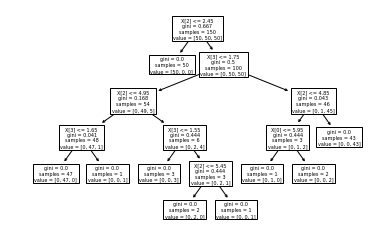

In [80]:
tree.plot_tree(classification_tree)

### Graphviz display of the tree

**[python-graphviz](https://anaconda.org/conda-forge/python-graphviz)** is another great visualization tool based on the [graphviz](https://www.graphviz.org/) tool suite. Sadly, it can be a bit of a pain to install in some environments [read [Windows](https://github.com/ContinuumIO/anaconda-issues/issues/1666)] so expect issues such as:

```
    ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' PATH
```

These can be solved on a system by system basis, but there is no universal solution for all platforms.

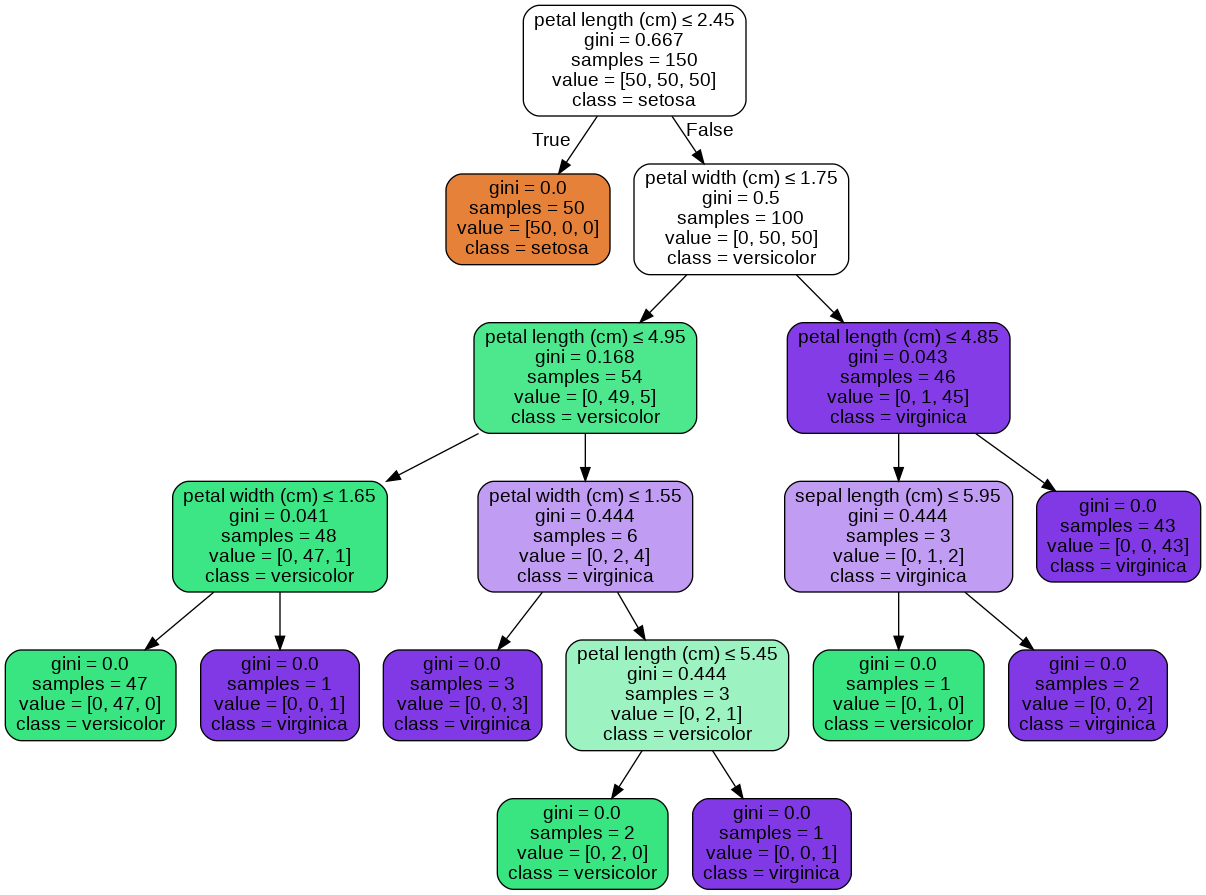

In [81]:
import graphviz 
from IPython.display import Image

dot_data = tree.export_graphviz(
    classification_tree, out_file=None, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,  
    filled=True,
    rounded=True,  
    special_characters=True
)  
graph = graphviz.Source(dot_data)  
thefile = graph.render("iris", format='png') 
Image(filename=thefile) 

## Adjusting decision tree parameters

There are several parameters that you can set for your decision tree model in Scikit Learn too. Here are a few of the more interesting ones to play around with to try and get some better results:

- **max_depth**: The max depth of the tree where we will stop splitting the nodes. This is similar to controlling the maximum number of layers in a deep neural network. Lower will make your model faster but not as accurate; higher can give you accuracy but risks overfitting and may be slow.

- **min_samples_split**: The minimum number of samples required to split a node. We discussed this aspect of decision trees above and how setting it to a higher value would help mitigate overfitting.

- **max_features**: The number of features to consider when looking for the best split. Higher means potentially better results with the tradeoff of training taking longer.

- **min_impurity_split**: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold. This can be used to tradeoff combating overfitting (high value, small tree) vs high accuracy (low value, big tree).

- **presort**: Whether to presort the data to speed up the finding of best splits in fitting. If we sort our data on each feature beforehand, our training algorithm will have a much easier time finding good values to split on.

## Tips for Practically Applying Decision Trees

Here are a few of the pro and cons of decision trees that can help you decide on whether or not it’s the right model for your problem, as well as some tips as to how you can effectively apply them:

### Pros

- **Easy to understand and interpret**. At each node, we are able to see exactly what decision our model is making. In practice we’ll be able to fully understand where our accuracies and errors are coming from, what type of data the model would do well with, and how the output is influenced by the values of the features. Scikit learn’s visualisation tool is a fantastic option for visualising and understanding decision trees.

- **Require very little data preparation**. Many ML models may require heavy data pre-processing such as normalization and may require complex regularisation schemes. Decision trees on the other hand work quite well out of the box after tweaking a few of the parameters.

- **The cost of using the tree for inference is logarithmic in the number of data points used to train the tree**. That’s a huge plus since it means that having more data won’t necessarily make a huge dent in our inference speed.

### Cons

- **Overfitting is quite common** with decision trees simply due to the nature of their training. It’s often recommended to perform some type of dimensionality reduction such as PCA so that the tree doesn’t have to learn splits on so many features.

- **Vulnerable to bias**. For similar reasons as the case of overfitting, decision trees are also vulnerable to becoming biased to the classes that have a majority in the dataset. It’s always a good idea to do some kind of class balancing such as class weights, sampling, or a specialised loss function.

# Scikit-Learn Decision Trees Explained

Decision trees are the most important elements of a **[Random Forest](https://en.wikipedia.org/wiki/Random_forest)**. They are capable of fitting complex data sets while allowing the user to see how a decision was taken. While searching the web I was unable to find one clear article that could easily describe them, so here I am writing about what I have learned so far. It’s important to note, a single decision tree is not a very good predictor; however, one can create an ensemble of them (a forest) and collect their predictions.  Then, by allowing each tree vote for its prediction and selecting the winner, one of the most powerful machine learning tools can be obtained — the so called Random Forest.


In [82]:
# Importing Libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load data and store it into pandas DataFrame objects
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

# Defining and fitting a DecisionTreeClassifier instance
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Visualizing The Decision Tree
Of course we still do not know how this tree classifies samples, so let’s visualize this tree by first creating a dot file using Scikit-Learn export_graphviz module and then processing it with graphviz.

In [0]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz

# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "myTreeName.dot",
            feature_names = list(X.columns),
            class_names = iris.target_names,
            filled = True,
            rounded = True)

This will create a file named tree.dot that needs to be processed on graphviz. The end result should be similar to the one shown in Figure-1; however, a different tree might sprout even if the training data is the same!

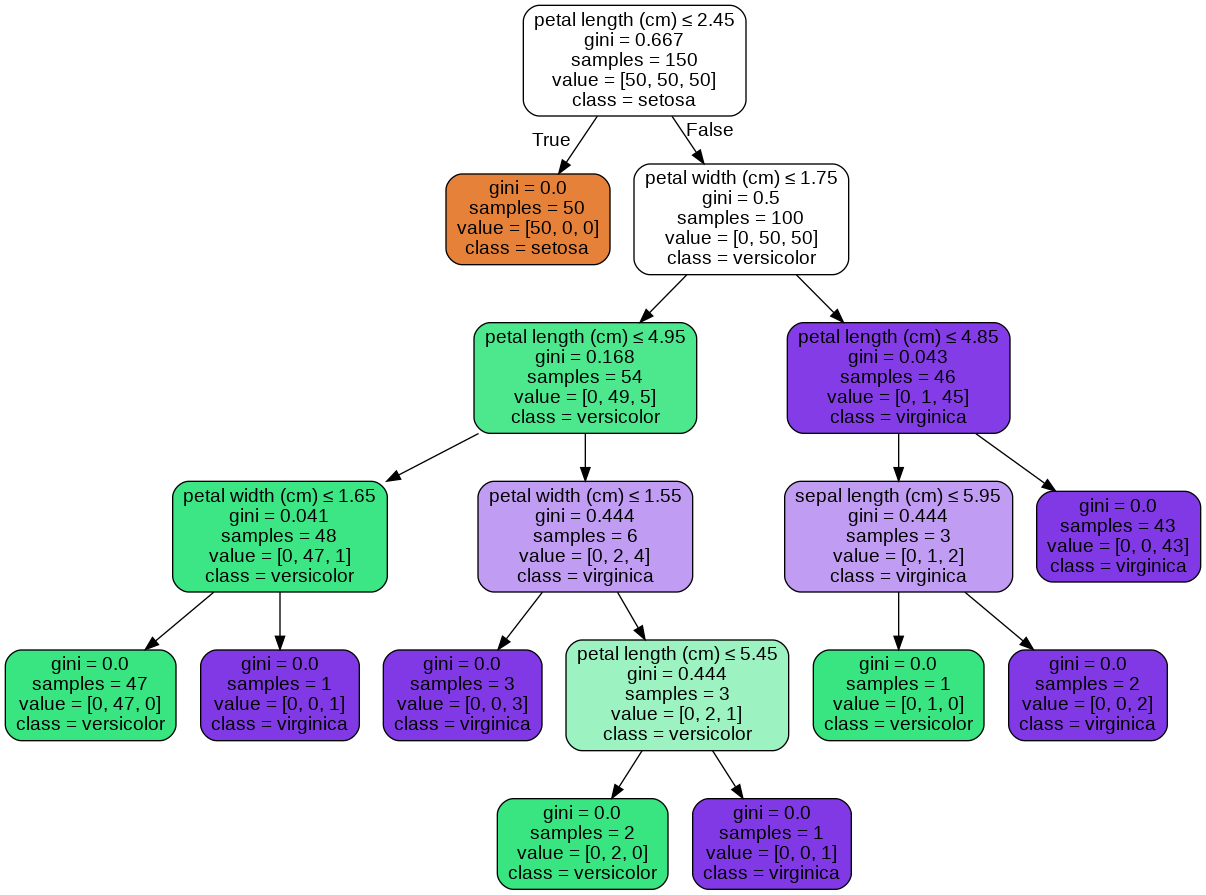

In [84]:
thefile = graph.render("myTreeName.dot", format='png') 
Image(filename=thefile) 

<figure><br>
  <center><img src="https://miro.medium.com/max/484/1*gql3YU01S-BUiCt8mgE66w.png" />
  <figcaption>Our decision tree: In this case, nodes are colored in white, while leaves are colored in orange,
      green, and purple. More about leaves and nodes later.
   </figcaption></center>
</figure>

### Understanding the Contents of a Node

In the figure above, you can see that each box contains several characteristics. Let’s start by describing the content of the top most node, most commonly referred to as the root node. The root node is at a depth of zero, see below. A node is a point along the decision tree graph, where a question is asked. This action divides the data into smaller subsets.

<figure><br>
  <center><img src="https://miro.medium.com/max/700/1*tMU0XhEbj5aKgGt9RX-UQQ.png" /></center>
</figure>


- **petal length (cm) <=2.45**: The first question the decision tree asks is if the petal length is less than 2.45. Based on the result, it either follows the true or the false path.

- **gini = 0.667**: The gini score is a metric that quantifies the purity of the node/leaf (more about leaves in a bit). A gini score greater than zero implies that samples contained within that node belong to different classes. A gini score of zero means that the node is pure, that within that node only a single class of samples exist. You can find out more about impurity measures here. Notice that we have a gini score greater than zero; therefore, we know that the samples contained within the root node belong to different classes.

- **samples = 150**: Since the iris flower data set contains 150 samples, this value is set to 150.

- **value = [50, 50, 50]**: The value list tells you how many samples at the given node fall into each category. The first element of the list shows the number of samples that belong to the setosa class, the second element of the list shows the number of samples that belong to the versicolor class, and the third element in the list shows the number of samples that belong to the virginica class. Notice how this node is not a pure one since different types of classes are contained within the same node. We knew this already from the gini score, but it’s nice to actually see it.

- **class = setosa**: The class value shows the prediction a given node will make and it can be determined from the value list. Whichever class occurs the most within the node will be selected as the class value. If the decision tree were to end at the root node, it would predict that all 150 samples belonged to the setosa class. Of course this makes no sense, since there is an equal number of samples for each class. It seems to me that the decision tree is programmed to choose the first class on the list if there is an equal number of samples for each class.

### Understanding How a Tree Makes a Split

To determine which feature to use to make the first split — that is, to make the root node — the algorithm chooses a feature and makes a split. It then looks at the subsets and measures their impurity using the gini score. It does this for multiple thresholds and determines that the best split for the given feature is the one that produces the purest subsets. This is repeated for all the features in the training set. Ultimately, the root node is determined by the feature that produces a split with purest subsets. Once the root node is decided, the tree is grown to a depth of one. The same process is repeated for the other nodes in the tree.

### Understanding How a Tree Will Make a Prediction

Suppose we have a flower with `petal_length = 1` and `petal_width = 3`. If we follow the logic of the decision tree shown on Figure-1, we will see that we will end up in the orange box. In the tree graph, if the question a node asks turns out to be true (false), we will move to the left (right). The orange box is at a depth of one, see above. Since there is nothing growing out of this box, we will refer to it as a leaf node. Notice the resemblance this has to an actual tree, see below. Moreover, note that the gini score is zero — which makes it a pure leaf. The total number of samples is 50. Out of the 50 samples that end up on the orange leaf node, we can see that all of them belong to the setosa class, see the value list for this leaf. Therefore, the tree will predict that the sample is a setosa flower.

<figure><br>
  <center><img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/dt_3.png?raw=1" />
      <figcaption>Real tree vs Decision Tree Similarity: The tree on the left is inverted to illustrate how a tree grows from its root and ends at its leaves. Seeing the decision tree on the right should make this analogy more clear.
   </figcaption></center>
</figure>

### Making a Prediction On New Samples Using a Trained Tree

Now that we know how our decision tree works, let us make predictions. The input should be in a list and ordered as [sepal length, sepal width, petal length, petal width] where the sepal length and sepal width won't affect the predictions made by the decision tree shown in the graph; therefore, we can assign them an arbitrary value.

In [85]:
# Making a Prediction On a New Sample
sample_one_pred = int(tree.predict([[5, 5, 1, 3]]))
sample_two_pred = int(tree.predict([[5, 5, 2.6, 1.5]]))
print(f"The first sample most likely belongs to the {iris.target_names[sample_one_pred]} class.")
print(f"The second sample most likely belongs to the {iris.target_names[sample_two_pred]} class.")

The first sample most likely belongs to the setosa class.
The second sample most likely belongs to the versicolor class.


## Scikit-Learn Decision Tree Parameters

If you take a look at the parameters the DecisionTreeClassifier can take, you might be surprised so, let’s look at some of them.

- **criterion**: This parameter determines how the impurity of a split will be measured. The default value is “gini” but you can also use “entropy” as a metric for impurity.

- **splitter**: This is how the decision tree searches the features for a split. The default value is set to “best”. That is, for each node, the algorithm considers all the features and chooses the best split. If you decide to set the splitter parameter to “random,” then a random subset of features will be considered. The split will then be made by the best feature within the random subset. The size of the random subset is determined by the max_features parameter. This is partly where a Random Forest gets its name.

- **max_depth**: This determines the maximum depth of the tree. In our case, we use a depth of two to make our decision tree. The default value is set to none. This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent over-fitting. Below, you can see what happens if you don’t set the depth of the tree — pure madness!

<figure><br>
  <center><img src="https://github.com/jfogarty/machine-learning-intro-workshop/blob/master/images/dt_4.png?raw=1" />
      <figcaption>A fully grown Decision Tree: In the tree shown above, none of the parameters were set. The tree grows fully to a depth of five. There are eight nodes and nine leaves. Not limiting the growth of a decision tree may lead to over-fitting.
   </figcaption></center>
</figure>

- **min_samples_split**: The minimum number of samples a node must contain in order to consider splitting. The default value is two. You can use this parameter to regularize your tree.

- **min_samples_leaf**: The minimum number of samples needed to be considered a leaf node. The default value is set to one. Use this parameter to limit the growth of the tree.

- **max_features**: The number of features to consider when looking for the best split. If this value is not set, the decision tree will consider all features available to make the best split. Depending on your application, it’s often a good idea to tune this parameter.

In [90]:
# Setting parameters
tree = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 2,  min_samples_split = 15,
                              min_samples_leaf = 2, max_features = 2, random_state=11)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=11, splitter='random')

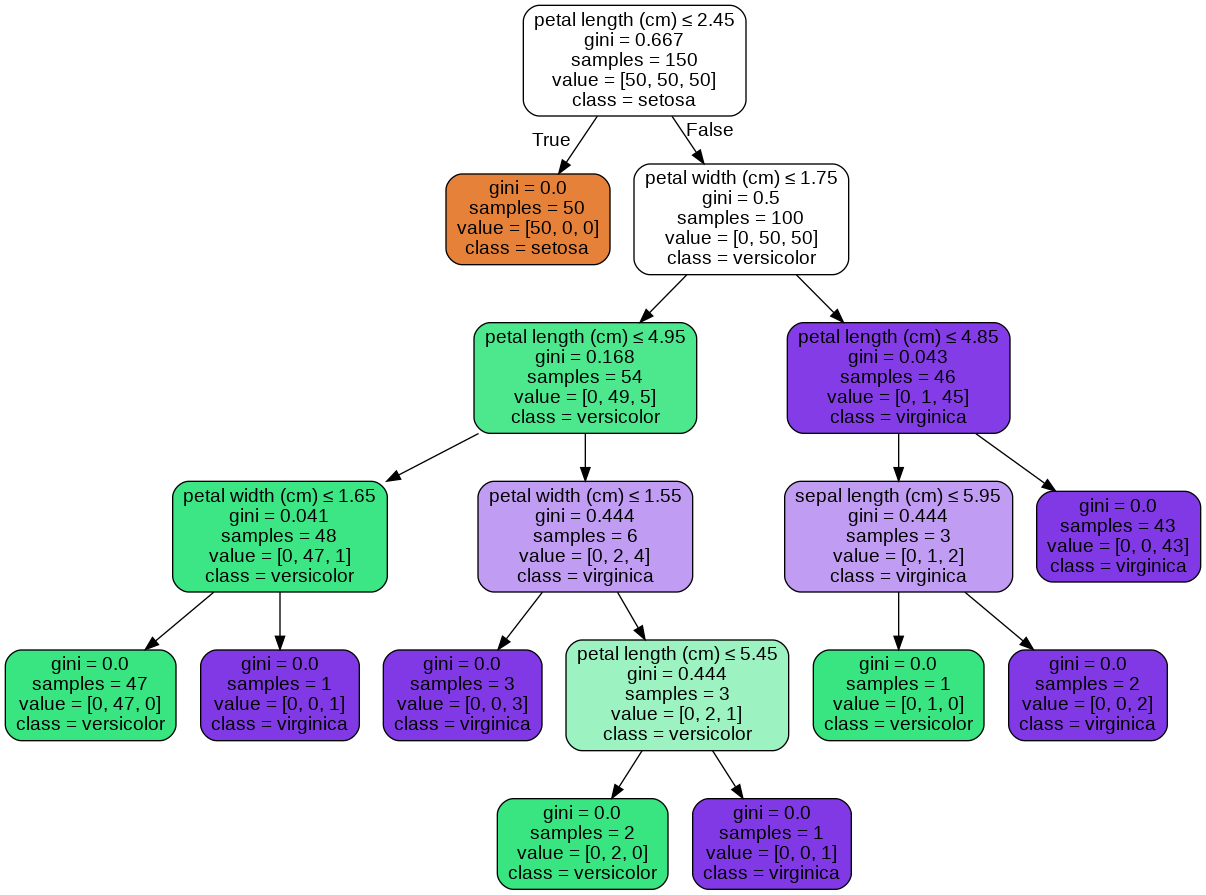

In [91]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz

# Creates dot file named tree.dot
dotfile = "anotherZZZTreeName.dot"
export_graphviz(
            tree,
            out_file = dotfile,
            feature_names = list(X.columns),
            class_names = iris.target_names,
            filled = True,
            rounded = True)
thefile = graph.render(dotfile, format='png') 
Image(filename=thefile) 

## Back to the Forest...

Now you know how to create a decision tree using Scikit-learn. More importantly, you should be able to visualize it and understand how it classifies samples. It’s important to note that one needs to limit the liberty of a decision tree. There are several parameters that can regularize a tree. By default, the max_depth is set to none. Therefore, a tree will grow fully, which often results in over-fitting. Moreover, a single decision tree is not a very powerful predictor.  We mentioned before that we usually use greedy algorithms to decide splits.  There is no guarantee that any split is optimal, and aside from pruning, we don't revisit older splits to improve them in any way.

The real power of decision trees unfolds more so when cultivating many of them — while limiting the way they grow — and collecting their individual predictions to form a final conclusion. In other words, you grow a forest, and if your forest is random in nature, using the concept of bagging and with splitter = "random", we call this a Random Forest. Many of the parameters used in Scikit-Learn Random Forest are the same ones explained in this article. So it’s a good idea to understand what a single decision tree is and how it works, before moving on to using the big guns.

Let's build a forest.  In this case, we use 20 decision trees, each with a maximum depth of 2 - much shorter than the trees we produced above, so they won't all be correct.  We also set a random number seed, and ignore warnings.

In [88]:
from sklearn.ensemble import RandomForestClassifier
sherwood = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=5)
sherwood.fit(X, y)
print(f"Relative feature importances: {sherwood.feature_importances_}")
sample_pred = sherwood.predict([[5,5,1,3]])
print(f"This sample most likely belongs to the {iris.target_names[sample_pred]} class.")

Relative feature importances: [0.14723009 0.00933963 0.40191985 0.44151043]
This sample most likely belongs to the ['setosa'] class.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


One important note: you still need to tune your hyperparameters a bit even when working with a mighty forest.  For example, if you don't have a large enough max_depth, then your forest might still get its answer wrong despite lots of trees voting.  For example, if you set a random number seed of 0 and max_depth of 2, this example comes up with the wrong answer, even though most other seeds get the right answer.  If you increase the max_depth, then it will eventually find the correct class even with the unlucky seed.

In [89]:
sherwood = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)
sherwood.fit(X, y)
sample_pred = sherwood.predict([[5,5,1,3]])
print(f"Our forest says this most likely belongs to the {iris.target_names[sample_pred]} class, but we know better.")

sherwood = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=0)
sherwood.fit(X, y)
sample_pred = sherwood.predict([[5,5,1,3]])
print(f"Our DEEPER forest says this most likely belongs to the {iris.target_names[sample_pred]}.")


Our forest says this most likely belongs to the ['versicolor'] class, but we know better.
Our DEEPER forest says this most likely belongs to the ['setosa'].


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


<figure><br>
  <center><img src="https://raw.githubusercontent.com/KevinSikorskiBase2S/machine-learning-intro-workshop/master/images/entMoot.gif" />
      <figcaption>Rare footage of an entmoot, where trees gather to vote on what to do about deforestation, jewelry, and short people.
   </figcaption></center>
</figure>


### End of note.